In [1]:
import pandas as pd

# Path to your CSV file
file_path = '/Users/antoinemunier/DEV/thesis/Data/top10_nuclear.csv'
df_base = pd.read_csv(file_path)

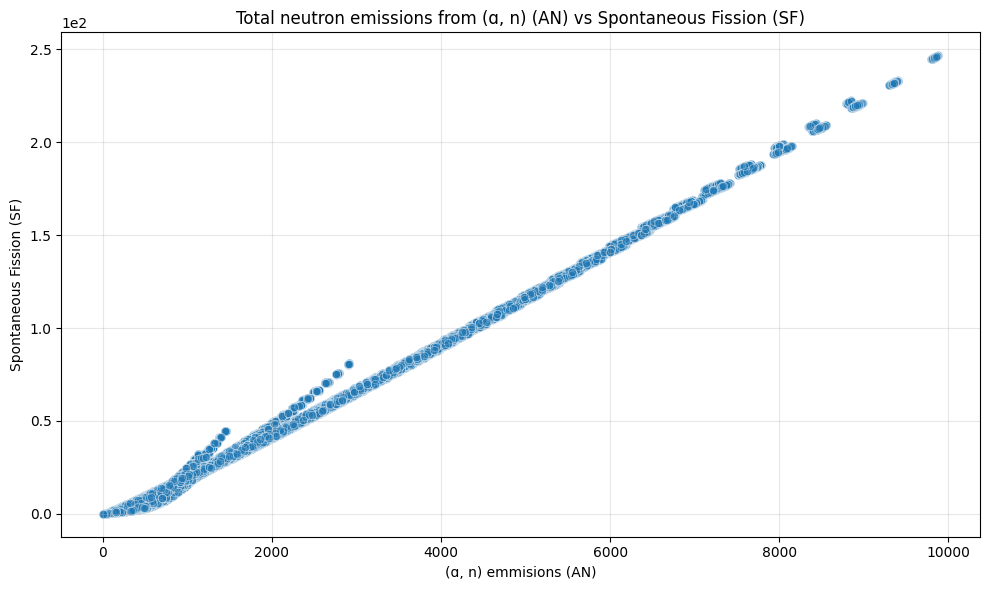


Correlation coefficient between AN and SF: 0.9946


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_base, x='AN', y='SF', alpha=0.5)

# Customize the plot
plt.title('Total neutron emissions from (ɑ, n) (AN) vs Spontaneous Fission (SF)')
plt.xlabel('(ɑ, n) emmisions (AN)')
plt.ylabel('Spontaneous Fission (SF)')

# Add a grid for better readability
plt.grid(True, alpha=0.3)

# Optional: Use scientific notation for y-axis if values are very large
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nCorrelation coefficient between AN and SF:", 
      df_base['AN'].corr(df_base['SF']).round(4))

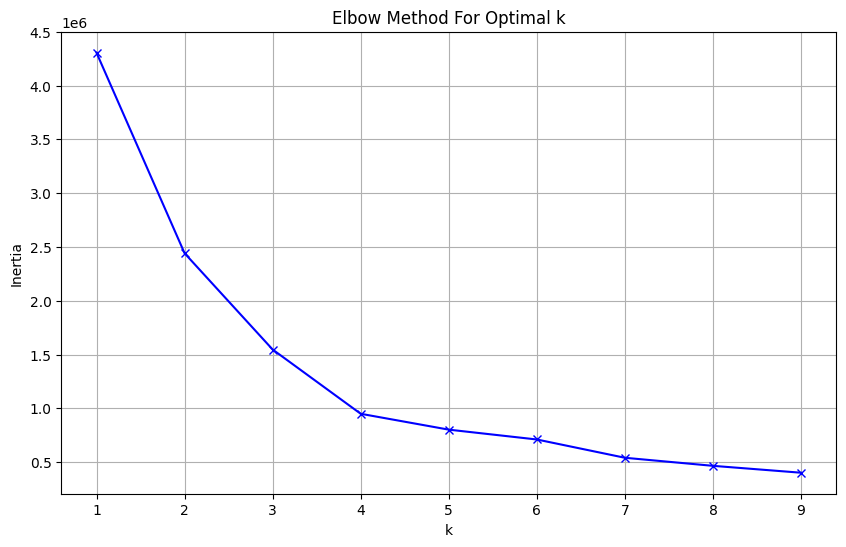


Optimal number of clusters based on elbow method: 4


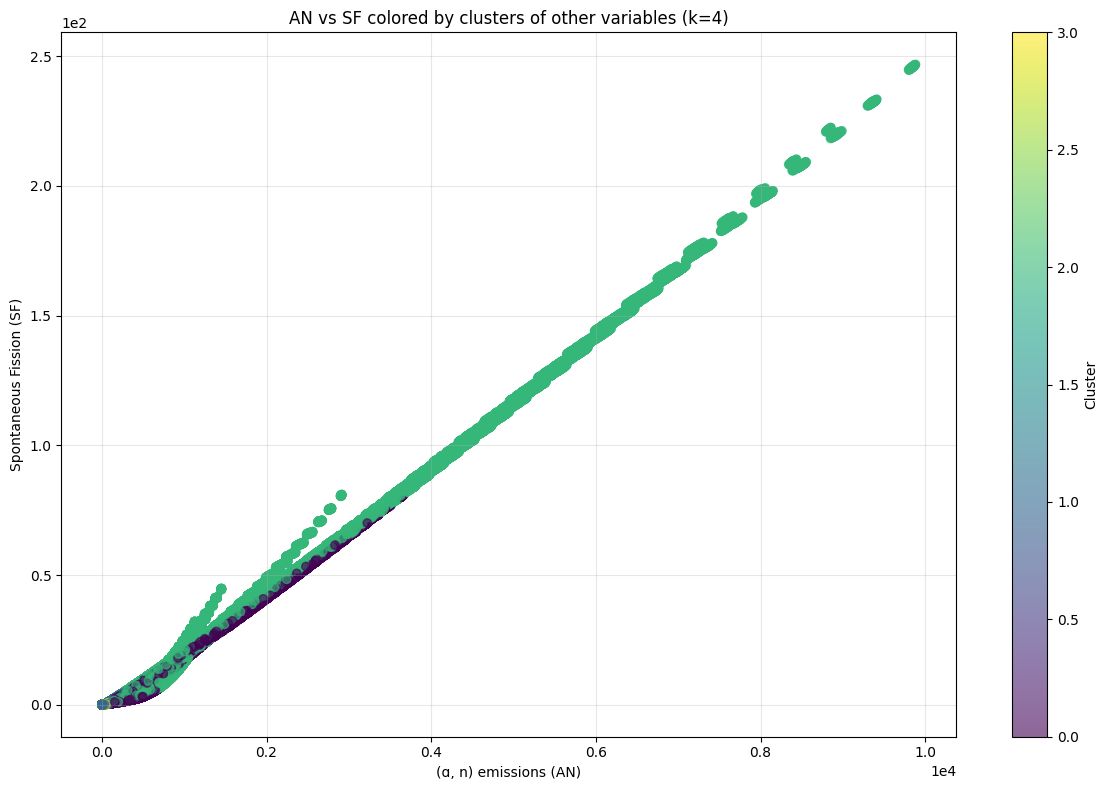


Correlation coefficient between AN and SF: 0.9946

Cluster centers for each feature:
   fuel_U238  fuel_U235  fuel_Pu239  fuel_U236  fuel_U234
0     1.8604     0.3365      0.0136     0.0136     0.0034
1     1.9868     0.2772      0.0021     0.0016     0.0026
2     1.9730     0.2238      0.0151     0.0126     0.0022
3     1.8698     0.3924      0.0018     0.0017     0.0037


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Get all columns except AN and SF for clustering
cluster_columns = [col for col in df_base.columns if col not in ['AN', 'SF', 'fuel_TOT_GS', 'fuel_TOT_DH', 'fuel_TOT_A']]

# Standardize the features for clustering
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_base[cluster_columns])

# Elbow method to find optimal number of clusters
inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Calculate the rate of change in inertia
inertia_changes = np.diff(inertias)
rate_of_change = np.diff(inertia_changes)
optimal_k = np.argmin(rate_of_change)

print(f"\nOptimal number of clusters based on elbow method: {optimal_k}")

# Perform k-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Create scatter plot with cluster colors
scatter = plt.scatter(df_base['AN'], df_base['SF'], 
                     c=cluster_labels, 
                     cmap='viridis', 
                     alpha=0.6)

# Customize the plot
plt.title(f'AN vs SF colored by clusters of other variables (k={optimal_k})')
plt.xlabel('(ɑ, n) emissions (AN)')
plt.ylabel('Spontaneous Fission (SF)')

# Add a grid for better readability
plt.grid(True, alpha=0.3)

# Add colorbar
plt.colorbar(scatter, label='Cluster')

# Use scientific notation for axes if values are very large
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.tight_layout()
plt.show()

# Print some statistics
print("\nCorrelation coefficient between AN and SF:", 
      df_base['AN'].corr(df_base['SF']).round(4))

# Print cluster centers for interpretation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=cluster_columns)
print("\nCluster centers for each feature:")
print(cluster_df.round(4))

In [2]:
df_base.describe()

,fuel_U238,fuel_U235,fuel_Pu239,fuel_U236,fuel_U234,AN,SF,fuel_TOT_GS,fuel_TOT_DH,fuel_TOT_A
count,861000.000000,861000.000000,861000.000000,861000.000000,861000.000000,861000.000000,861000.000000,8.610000e+05,8.610000e+05,8.610000e+05
mean,1.923939,0.309374,0.007542,0.006796,0.002992,430.205664,8.202050,2.565229e+18,2.816373e+05,2.851769e+18
std,0.067318,0.071019,0.006864,0.006374,0.000684,957.054285,22.240783,4.937859e+18,4.750295e+05,4.782976e+18
min,1.793550,0.153199,0.000000,0.000000,0.001612,0.838400,0.024830,1.794450e+12,9.929460e+00,1.285680e+13
25%,1.866050,0.252438,0.000002,0.000002,0.002417,1.632000,0.027240,1.843848e+15,5.020710e+02,6.031115e+15
50%,1.923310,0.309491,0.006842,0.005770,0.002989,76.250000,0.458700,1.072380e+17,3.645105e+04,4.657805e+17
75%,1.980540,0.365849,0.013901,0.012487,0.003566,403.400000,4.402000,1.718972e+18,3.621900e+05,3.455268e+18
max,2.049180,0.450394,0.020921,0.020120,0.004320,9883.000000,246.800000,1.820540e+19,1.663620e+06,1.780210e+19


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Create a copy of the dataframe to store normalized values
df_normalized = df_base.copy()

columns_to_normalize = df_base.columns

# Normalize each column
df_normalized[columns_to_normalize] = scaler.fit_transform(df_base[columns_to_normalize])

R² scores for each isotope:
fuel_Pu239: 0.3227
fuel_U236: 0.3197
fuel_U235: 0.0353
fuel_U238: 0.0158
fuel_U234: 0.0142


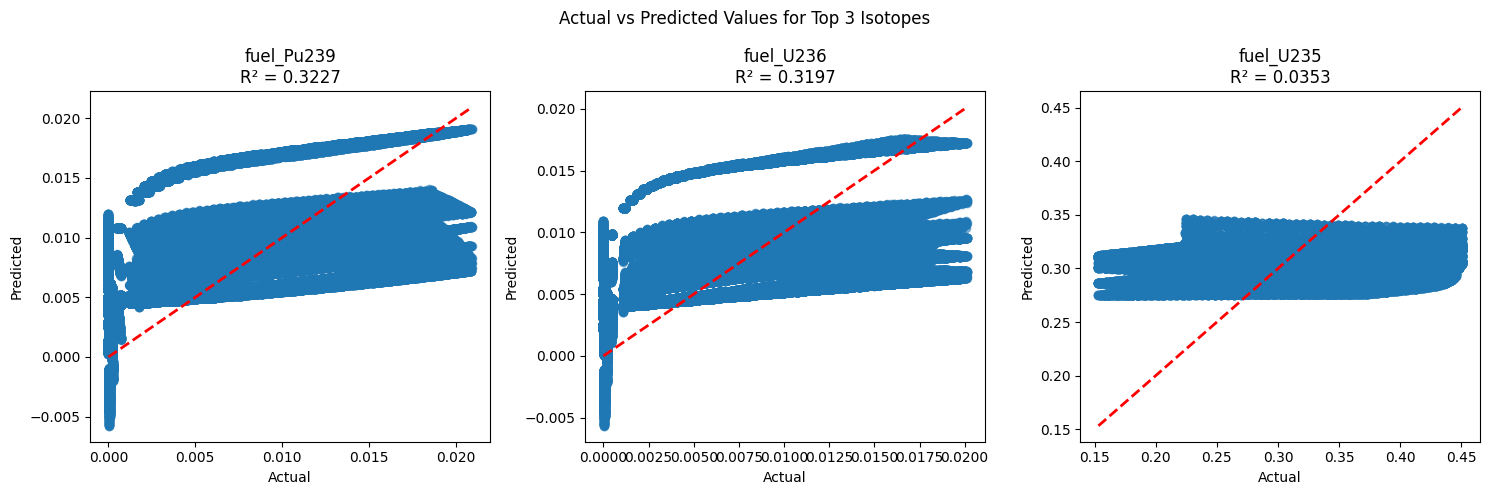


Feature importance for top 3 isotopes:

fuel_Pu239:
fuel_TOT_A: 0.000000
fuel_TOT_GS: -0.000000
fuel_TOT_DH: 0.000000
SF: -0.000000
AN: 0.000000

fuel_U236:
fuel_TOT_A: 0.000000
fuel_TOT_GS: -0.000000
fuel_TOT_DH: 0.000000
SF: -0.000000
AN: 0.000000

fuel_U235:
fuel_TOT_A: -0.000000
fuel_TOT_GS: 0.000000
fuel_TOT_DH: -0.000000
SF: 0.000000
AN: -0.000000


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Define input (X) and output (y) features
input_features = ['AN', 'SF', 'fuel_TOT_GS', 'fuel_TOT_DH', 'fuel_TOT_A']
output_features = [
    'fuel_U238', 'fuel_U235', 'fuel_Pu239', 'fuel_U236', 'fuel_U234'
]

# Prepare the data
X = df_base[input_features]
y = df_base[output_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R² scores for each isotope
r2_scores = {}
for i, isotope in enumerate(output_features):
    r2 = r2_score(y_test[isotope], y_pred[:, i])
    r2_scores[isotope] = r2

# Sort isotopes by R² score
sorted_isotopes = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Print results
print("R² scores for each isotope:")
for isotope, score in sorted_isotopes:
    print(f"{isotope}: {score:.4f}")

# Plot actual vs predicted for the top 3 best-predicted isotopes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Actual vs Predicted Values for Top 3 Isotopes')

for i, (isotope, score) in enumerate(sorted_isotopes[:3]):
    ax = axes[i]
    idx = output_features.index(isotope)
    
    # Plot actual vs predicted
    ax.scatter(y_test[isotope], y_pred[:, idx], alpha=0.5)
    ax.plot([y_test[isotope].min(), y_test[isotope].max()], 
            [y_test[isotope].min(), y_test[isotope].max()], 
            'r--', lw=2)
    
    ax.set_title(f'{isotope}\nR² = {score:.4f}')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Print feature importance for the top 3 isotopes
print("\nFeature importance for top 3 isotopes:")
for isotope, score in sorted_isotopes[:3]:
    idx = output_features.index(isotope)
    importance = dict(zip(input_features, model.coef_[idx]))
    print(f"\n{isotope}:")
    for feature, coef in sorted(importance.items(), key=lambda x: abs(x[1]), reverse=True):
        print(f"{feature}: {coef:.6f}")

### XGBoost

R² scores for each isotope:
fuel_Pu239: 0.9995
fuel_U236: 0.9971
fuel_U235: 0.9316
fuel_U234: 0.9155
fuel_U238: 0.8886


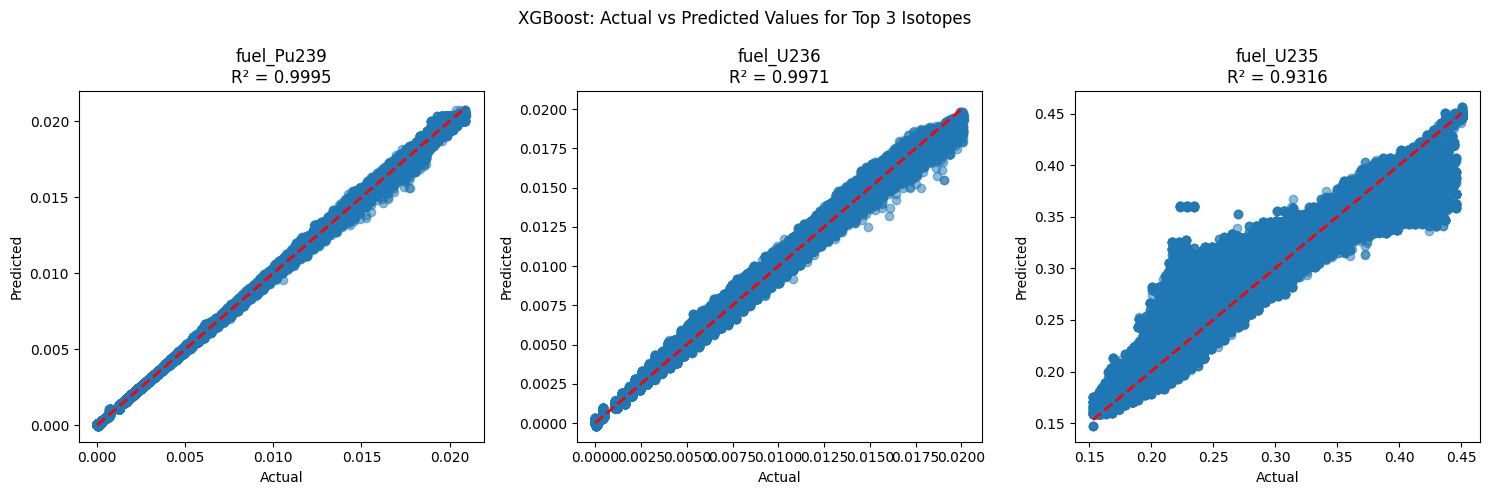


First 5 samples comparison:
--------------------------------------------------------------------------------

fuel_U238:
Sample	Actual		Predicted	Difference (%)
1	2.00e+00	1.98e+00	-0.79%
2	1.99e+00	1.93e+00	-3.08%
3	2.04e+00	1.99e+00	-2.39%
4	1.83e+00	1.86e+00	1.73%
5	1.89e+00	1.92e+00	1.40%
--------------------------------------------------------------------------------

fuel_U235:
Sample	Actual		Predicted	Difference (%)
1	2.75e-01	2.74e-01	-0.53%
2	2.68e-01	3.24e-01	20.80%
3	2.08e-01	2.41e-01	15.89%
4	3.77e-01	3.51e-01	-6.91%
5	3.59e-01	3.42e-01	-4.78%
--------------------------------------------------------------------------------

fuel_Pu239:
Sample	Actual		Predicted	Difference (%)
1	2.58e-04	2.63e-04	1.95%
2	2.64e-03	2.68e-03	1.64%
3	6.15e-03	6.18e-03	0.43%
4	1.23e-02	1.21e-02	-1.65%
5	4.84e-03	4.79e-03	-1.11%
--------------------------------------------------------------------------------

fuel_U236:
Sample	Actual		Predicted	Difference (%)
1	1.81e-04	1.74e-04	-4.29%
2	1.90e-03	

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Define input (X) and output (y) features (same as in your Linear Regression)
input_features = ['AN', 'SF', 'fuel_TOT_GS', 'fuel_TOT_DH', 'fuel_TOT_A']
output_features = [
    'fuel_U238', 'fuel_U235', 'fuel_Pu239', 'fuel_U236', 'fuel_U234'
]

# Prepare the data
X = df_base[input_features]
y = df_base[output_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionary to store models
models = {}
r2_scores = {}

# Train separate XGBoost model for each isotope
for isotope in output_features:
    # Initialize XGBoost model with parameters
    model = xgb.XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    
    # Train model
    model.fit(
        X_train, 
        y_train[isotope],
        eval_set=[(X_test, y_test[isotope])],
        verbose=False
    )
    
    # Store model
    models[isotope] = model
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate R² score
    r2 = r2_score(y_test[isotope], y_pred)
    r2_scores[isotope] = r2

# Sort isotopes by R² score
sorted_isotopes = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Print results
print("R² scores for each isotope:")
for isotope, score in sorted_isotopes:
    print(f"{isotope}: {score:.4f}")

# Plot actual vs predicted for the top 3 best-predicted isotopes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('XGBoost: Actual vs Predicted Values for Top 3 Isotopes')

for i, (isotope, score) in enumerate(sorted_isotopes[:3]):
    ax = axes[i]
    model = models[isotope]
    y_pred = model.predict(X_test)
    
    # Plot actual vs predicted
    ax.scatter(y_test[isotope], y_pred, alpha=0.5)
    ax.plot([y_test[isotope].min(), y_test[isotope].max()], 
            [y_test[isotope].min(), y_test[isotope].max()], 
            'r--', lw=2)
    
    ax.set_title(f'{isotope}\nR² = {score:.4f}')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# After training the models, add this section to display the first 5 samples:
print("\nFirst 5 samples comparison:")
print("-" * 80)
for isotope in output_features:
    model = models[isotope]
    y_pred = model.predict(X_test)
    
    print(f"\n{isotope}:")
    print("Sample\tActual\t\tPredicted\tDifference (%)")
    for i in range(5):
        actual = y_test[isotope].iloc[i]
        predicted = y_pred[i]
        diff_percent = ((predicted - actual) / actual) * 100
        print(f"{i+1}\t{actual:.2e}\t{predicted:.2e}\t{diff_percent:.2f}%")
    print("-" * 80)

# Print feature importance for the top 3 isotopes
print("\nFeature importance for top 3 isotopes:")
for isotope, score in sorted_isotopes[:3]:
    model = models[isotope]
    importance = dict(zip(input_features, model.feature_importances_))
    print(f"\n{isotope}:")
    for feature, imp in sorted(importance.items(), key=lambda x: x[1], reverse=True):
        print(f"{feature}: {imp:.6f}")

In [6]:
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

# Add these lines after calculating R² scores but before sorting
rmse_scores = {}
accuracy_scores = {}

for isotope in output_features:
    model = models[isotope]
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test[isotope], y_pred))
    rmse_scores[isotope] = rmse
    
    # Calculate accuracy (with a tolerance of 1% of the mean value)
    tolerance = np.mean(y_test[isotope]) * 0.01
    accuracy = np.mean(np.abs(y_test[isotope] - y_pred) <= tolerance)
    accuracy_scores[isotope] = accuracy

# Print all metrics
print("\nMetrics for each isotope:")
print("-" * 50)
print(f"{'Isotope':<12} {'R²':>10} {'RMSE':>12} {'Accuracy':>10}")
print("-" * 50)
for isotope in output_features:
    print(f"{isotope:<12} {r2_scores[isotope]:>10.4f} {rmse_scores[isotope]:>12.4e} {accuracy_scores[isotope]:>10.2%}")


Metrics for each isotope:
--------------------------------------------------
Isotope              R²         RMSE   Accuracy
--------------------------------------------------
fuel_U238        0.8886   2.2450e-02     73.36%
fuel_U235        0.9316   1.8581e-02     39.62%
fuel_Pu239       0.9995   1.5013e-04     63.66%
fuel_U236        0.9971   3.4532e-04     43.65%
fuel_U234        0.9155   1.9879e-04     38.67%
